# Matrix Plots

Matrix plots require the data to be on a matrix form: the index name and column name match up so that the cell value indicates something relevant to both names.

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


## **heatmap**

`seaborn.heatmap()`: Plots rectangular data as a color-encoded matrix.

**Parameters**:

- `data`: 2D dataset that can be coerced into an ndarray. If a Pandas DataFrame, the index/column info will be used for labeling.
- `vmin=None`, `vmax=None`: Values to anchor the colormap; inferred from the data if not provided.
- `cmap=None`: Mapping from data values to color space; default depends on the `center`.
- `center=None`: Value to center the colormap when plotting divergent data.
- `robust=False`: If `True`, uses robust quantiles to compute colormap range instead of extreme values.
- `annot=None`: If `True`, annotates cells with data values; can also be a rectangular dataset.
- `fmt='.2g'`: String format code for annotations.
- `annot_kws=None`: Keyword arguments for `matplotlib.axes.Axes.text()` when `annot` is `True`.
- `linewidths=0`: Width of the lines dividing each cell.
- `linecolor='white'`: Color of the lines dividing cells.
- `cbar=True`: Whether to draw a colorbar.
- `cbar_kws=None`: Keyword arguments for `matplotlib.figure.Figure.colorbar()`.
- `cbar_ax=None`: Axes for the colorbar; otherwise, takes space from the main Axes.
- `square=False`: If `True`, sets the Axes aspect to "equal" so each cell is square-shaped.
- `xticklabels='auto'`, `yticklabels='auto'`: Controls tick labels drawing; can be `True`, `False`, list-like, int, or "auto".
- `mask=None`: If `True`, data will not be shown in cells where `mask` is `True`. Missing values are automatically masked.
- `ax=None`: Axes to draw the plot on; uses the currently-active Axes if none provided.
- `**kwargs`: Other keyword arguments are passed to `matplotlib.axes.Axes.pcolormesh()`.


In [25]:
# get only numerical values -> corr() only works with numbers
numeric_tips = tips.select_dtypes(include=[np.number])
tc = numeric_tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

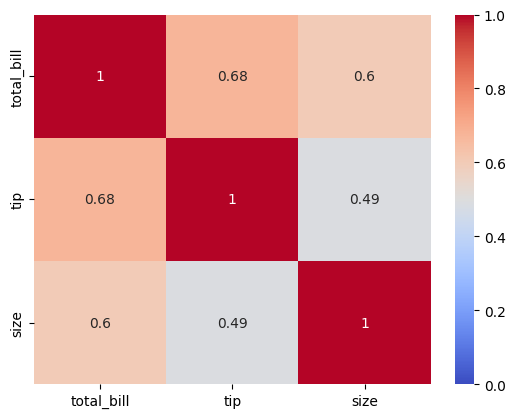

In [26]:
sns.heatmap(tc, cmap="coolwarm", vmin=0, vmax=1, annot=True)

In [27]:
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [29]:
# convert data into a matrix form
fp = flights.pivot_table(index="month", columns="year", values="passengers")
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


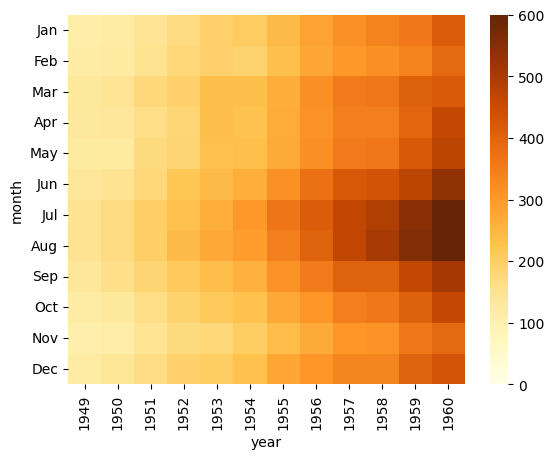

In [41]:
sns.heatmap(fp, cmap="YlOrBr", vmin=0, vmax=600)

# Rotate y labels to horizontal
plt.yticks(rotation=0)

plt.show()

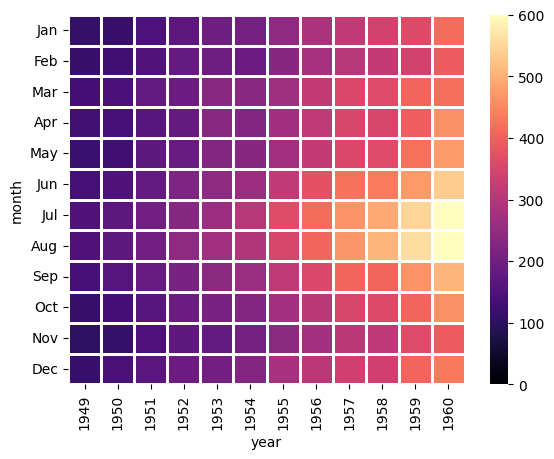

In [43]:
# with different palette and lines between each cell
sns.heatmap(fp, cmap="magma", vmin=0, vmax=600, linecolor="white", linewidths=2)

plt.yticks(rotation=0)
plt.show()

## **clustermap**

`seaborn.clustermap()`: Plots a matrix dataset as a hierarchically-clustered heatmap.

**Parameters**:

- `data`: Rectangular data for clustering. Cannot contain NAs.
- `pivot_kws=None`: Keywords for creating a rectangular dataframe from a tidy dataframe.
- `method='average'`: Linkage method for cluster calculation (`'single'`, `'complete'`, `'average'`, etc.).
- `metric='euclidean'`: Distance metric for clustering (e.g., `'euclidean'`, `'cityblock'`, etc.).
- `z_score=None`: Normalizes data by row (0) or column (1) with z-scores.
- `standard_scale=None`: Standardizes data by row (0) or column (1).
- `figsize=(10, 10)`: Figure size in inches.
- `cbar_kws=None`: Keyword arguments for the colorbar.
- `row_cluster=True`: Clusters the rows if `True`.
- `col_cluster=True`: Clusters the columns if `True`.
- `row_linkage=None`: Precomputed linkage matrix for rows.
- `col_linkage=None`: Precomputed linkage matrix for columns.
- `row_colors=None`: Colors for row labels.
- `col_colors=None`: Colors for column labels.
- `mask=None`: Masks data if `True`.
- `dendrogram_ratio=0.2`: Figure size proportion for dendrogram.
- `colors_ratio=0.03`: Figure size proportion for colors.
- `cbar_pos=(0.02, 0.8, 0.05, 0.18)`: Colorbar position in the figure.
- `tree_kws=None`: Keyword arguments for dendrogram tree lines.
- `**kwargs`: Other keyword arguments passed to `heatmap()`.

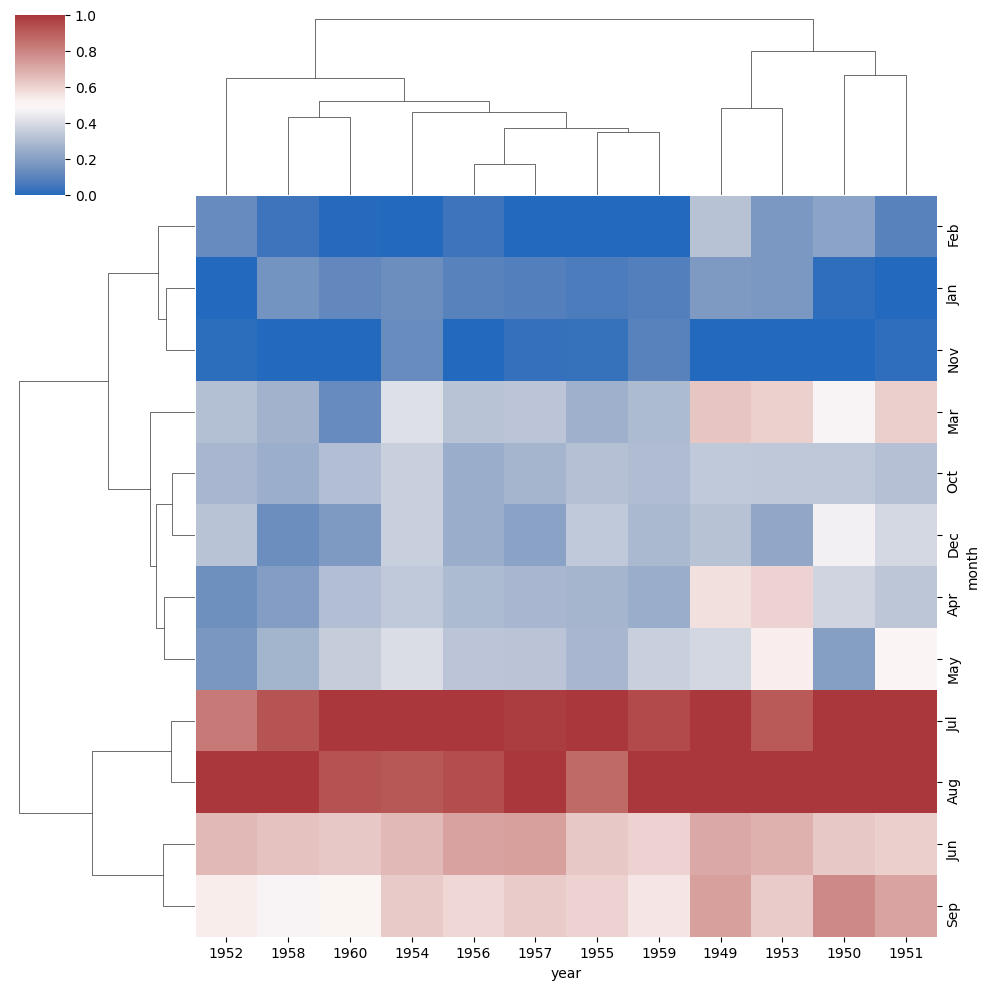

In [47]:
# clusters rows and columns together based of their similarity
sns.clustermap(fp, cmap='vlag', standard_scale=1)